In [17]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('/content/news.csv')#reading csv

In [3]:
df.head()#display first few rows of data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


#Pre-processing and EDA

In [4]:
df.isna().sum()#check for null values

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [5]:
df.describe()#statistical values

,Unnamed: 0
count,6335.000000
mean,5280.415627
std,3038.503953
min,2.000000
25%,2674.500000
50%,5271.000000
75%,7901.000000
max,10557.000000


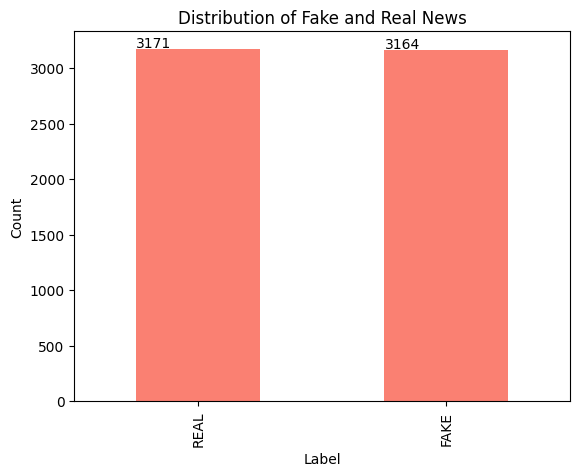

In [16]:
#  Get the value counts
label_counts = df['label'].value_counts()

# Plot the distribution of labels using bar chart
ax = label_counts.plot(kind='bar', color=["salmon"])
plt.title('Distribution of Fake and Real News')
plt.xlabel('Label')
plt.ylabel('Count')

# Adding of  count values on top of the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


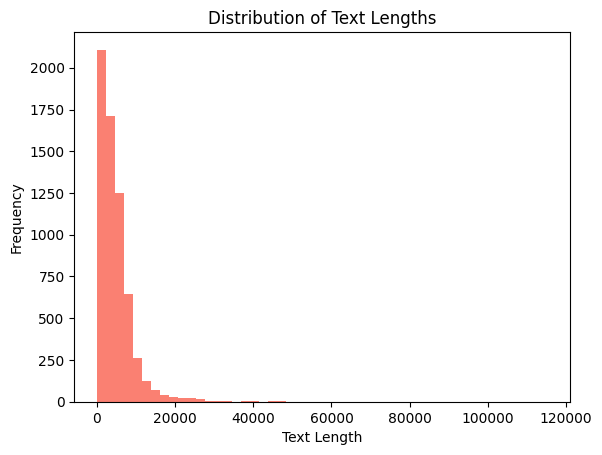

In [14]:
# Add a column for text length
df['text_length'] = df['text'].apply(len)

# Plotting the distribution of text lengths
df['text_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


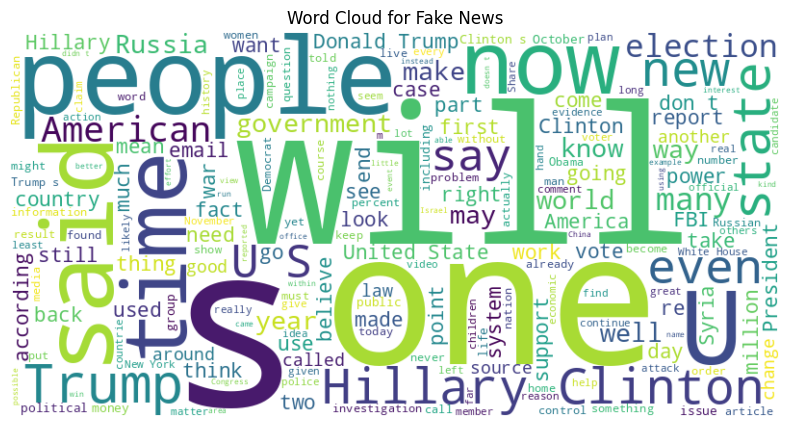

In [23]:
from wordcloud import WordCloud

# Generate word cloud for fake news
fake_text = ' '.join(df[df['label'] == 'FAKE']['text'])
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()


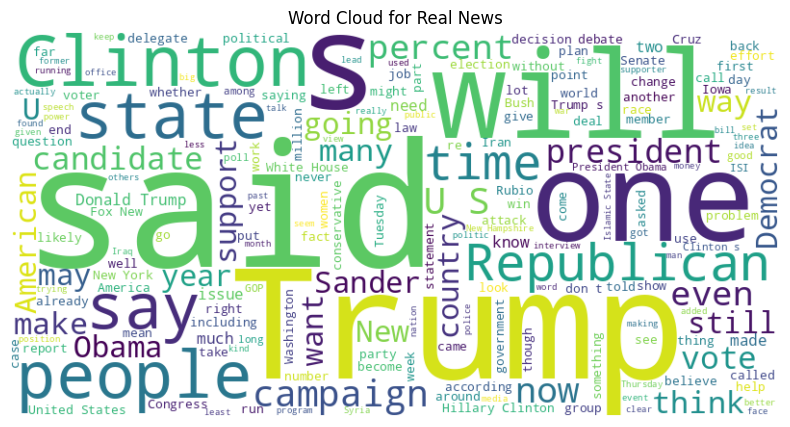

In [24]:
# Generate word cloud for real news
real_text = ' '.join(df[df['label'] == 'REAL']['text'])
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')
plt.show()


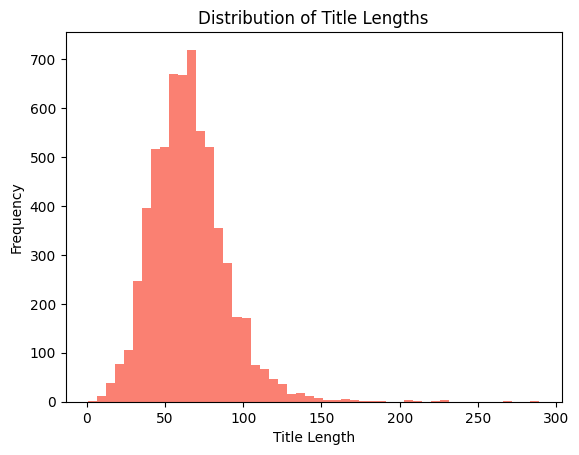

In [29]:
# Add a column for title length
df['title_length'] = df['title'].apply(len)

# Plot the distribution of title lengths
df['title_length'].plot(kind='hist',color=["salmon"],bins=50)
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


# Model training


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

vectorization

In [ ]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data, transform the testing data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


model used= Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(C=0.5,max_iter=1000)

# Train the model on the training data
model.fit(tfidf_train, y_train)


LogisticRegression(C=0.5, max_iter=1000)

The cross-validation scores indicate that your model performs well and consistently across different subsets of the data. The mean cross-validation score suggests that your model has a high level of accuracy and generalizes well to new data. This is a positive outcome and a strong indicator of your model's performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, tfidf_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.88954635 0.88954635 0.90138067 0.92102665 0.88746298]
Mean Cross-Validation Score: 0.8977926015058676


In [ ]:
# Make predictions on the test data
y_pred = model.predict(tfidf_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9076558800315706
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.89      0.93      0.91       628
        REAL       0.93      0.88      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267

Confusion Matrix:
 [[586  42]
 [ 75 564]]


For applications like fake news detection, both precision and recall
are important.


Precision ensures that the news articles flagged as FAKE are truly FAKE (minimizing false positives) and Recall ensures that most FAKE news articles are correctly identified (minimizing false negatives).

Since F1-score balances both precision and recall, it is a good metric to consider when you need a single measure of performance. The F1-score of 0.91 for both FAKE and REAL indicates that the model is well-balanced in identifying both types of news

There is scope of improvement in F1 score with change in c values of logistic regression

# Grid search CV
for finding best c value

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 0.5, 1, 5, 10]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(tfidf_train, y_train)
best_model = grid_search.best_estimator_
print("Best C value:", grid_search.best_params_['C'])


Best C value: 10


Model training using c=10

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(C=10,max_iter=1000)

# Train the model on the training data
model.fit(tfidf_train, y_train)


LogisticRegression(C=10, max_iter=1000)

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, tfidf_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.93293886 0.92209073 0.93195266 0.94965449 0.91905232]
Mean Cross-Validation Score: 0.931137811994369


In [ ]:
# Make predictions on the test data
y_pred = model.predict(tfidf_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9344909234411997
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.93       628
        REAL       0.94      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

Confusion Matrix:
 [[592  36]
 [ 47 592]]


F1 score improved by 1% but the model seems to be overfit as per the validation scores so again finding parameters using grid search cv considering penalty term too.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 0.5, 1, 10, 20],
    'penalty': ['l1', 'l2'],  # L1 for Lasso, L2 for Ridge
    'solver': ['liblinear', 'saga']  # Choose solver based on penalty
}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(tfidf_train, y_train)
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'C': 20, 'penalty': 'l2', 'solver': 'saga'}


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Logistic Regression model
model = LogisticRegression(C=20, penalty='l2', solver='saga', max_iter=1000)

# Train the model on the training data
model.fit(tfidf_train, y_train)

LogisticRegression(C=20, max_iter=1000, solver='saga')

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, tfidf_train, y_train, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.93491124 0.92307692 0.93293886 0.95162883 0.92201382]
Mean Cross-Validation Score: 0.9329139334606721


In [9]:
# Make predictions on the test data
y_pred = model.predict(tfidf_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9368587213891081
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94       628
        REAL       0.94      0.93      0.94       639

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267

Confusion Matrix:
 [[593  35]
 [ 45 594]]


Thus,F1 score improved by 3 % (91 to 94) with a descent cross validation score.

Testing on unseen fake data

In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the fake news statement
fake_news = {
    'title': 'Renowned Scientist Discovers Breakthrough in Renewable Energy',
    'text': """Dr. Samantha Grey, a highly respected scientist at the National Institute of Advanced Science,
               has reportedly made a groundbreaking discovery in the field of renewable energy. According to a recent
               study published in the prestigious Journal of Energy Science, Dr. Grey's innovative approach could
               potentially revolutionize the way we harness solar power. The new technique involves a novel method of
               converting sunlight directly into usable electricity with an efficiency rate never seen before. This
               discovery is expected to attract significant attention from governments and private investors worldwide,
               who are eager to transition to more sustainable energy sources. However, some experts are skeptical about
               the feasibility of implementing this technology on a large scale. Despite these doubts, Dr. Grey remains
               confident in her research and is currently preparing to present her findings at the upcoming International
               Conference on Renewable Energy."""
}



# Transform the text into the TF-IDF feature space
tfidf_vector = tfidf_vectorizer.transform([fake_news['text']])

# Predict the label using the trained model
predicted_label = model.predict(tfidf_vector)



print(f"Predicted label for the test fake news: {predicted_label}")


Predicted label for the test fake news: ['FAKE']
